In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from predict import evaluate_classification

In [4]:
data = pd.read_csv("./data/nsl-kdd/Train_Data.csv")
test = pd.read_csv("./data/nsl-kdd/Test_Data.csv")

In [6]:
X_train = data.iloc[:,data.columns!='label']
y_train = data.iloc[:,data.columns=='label'] 

X_test = test.iloc[:,test.columns!='label']
y_test = test.iloc[:,test.columns=='label']

print(f"{X_train.shape}")
print(f"{y_train.shape}")
print(f"{X_test.shape}")
print(f"{y_test.shape}")

(113270, 41)
(113270, 1)
(17171, 41)
(17171, 1)


In [8]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,8,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,40,8,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,44,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,8,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,8,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
y_train.head()

,label
0,1
1,1
2,0
3,1
4,1


Training time:  0.7343857288360596
Training Accuracy Decision tree 99.9955857685177  Test Accuracy Decision tree 90.1869431017413
Training Precesion Decision tree 100.0  Test Precesion Decision tree 85.90087672213275
Training Recall Decision tree 99.99257532334467  Test Recall Decision tree 98.87756152816394


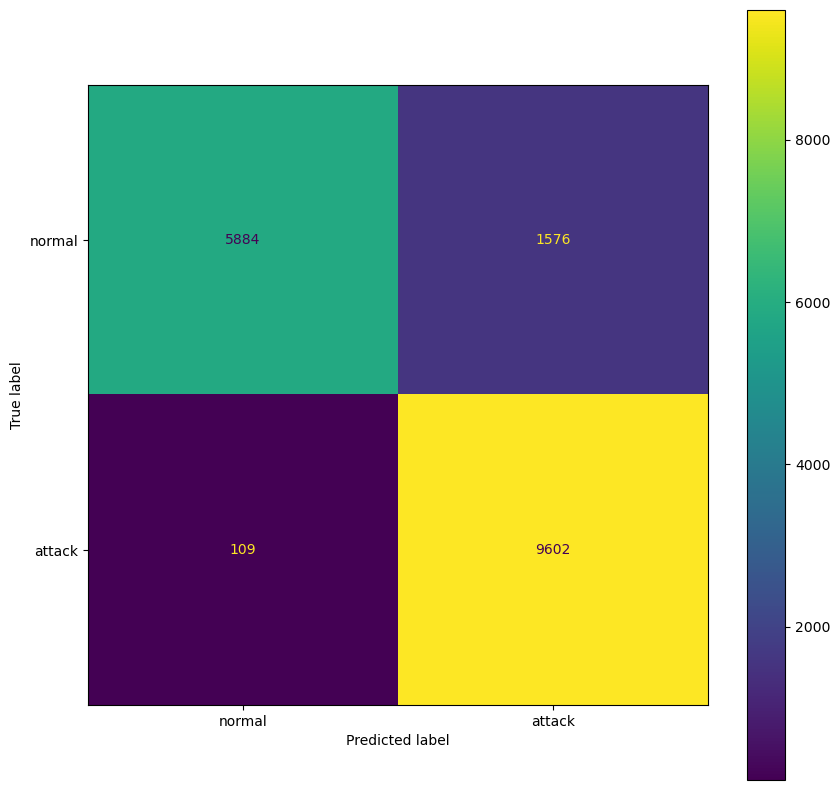

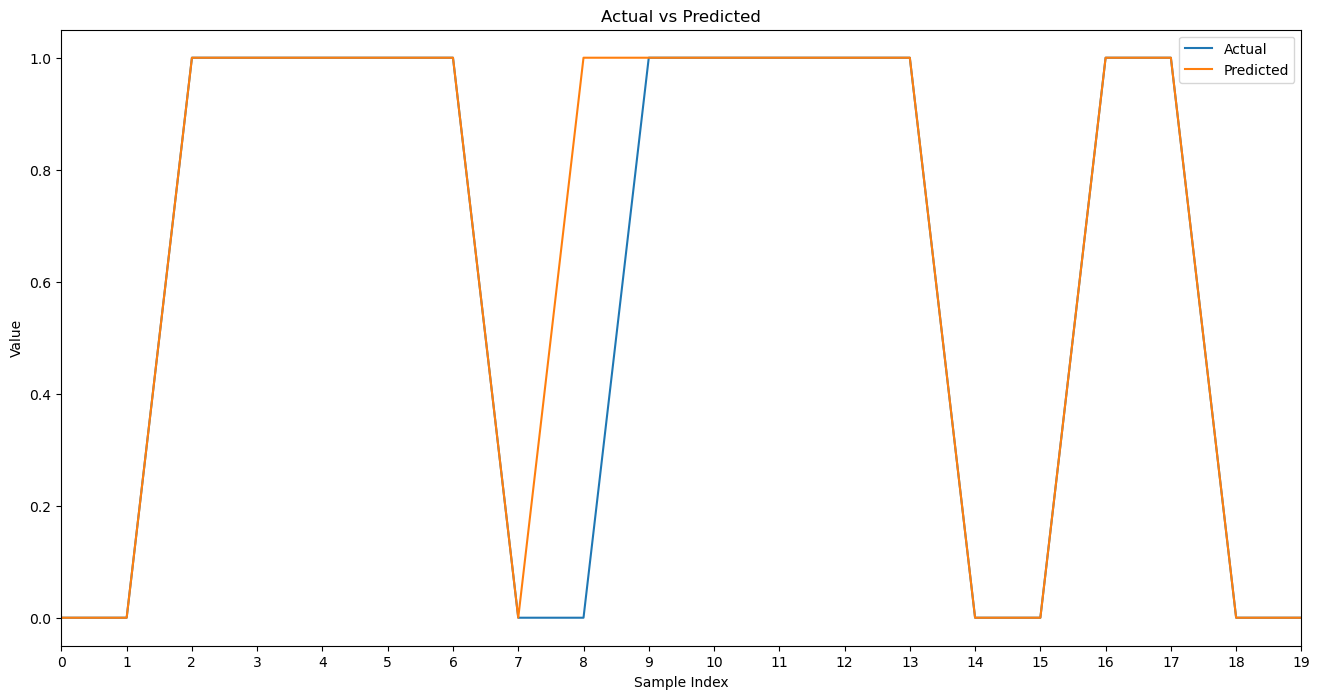

In [12]:
from sklearn.tree import DecisionTreeClassifier
import time
np.random.seed(42)

dt = DecisionTreeClassifier()
start_time = time.time()

dt.fit(X_train, y_train)

end_time = time.time()
print("Training time: ", end_time-start_time)

evaluate_classification(dt, "Decision tree", X_train, X_test, y_train, y_test)

In [14]:
start_time = time.time()
y_preds = dt.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.022780895233154297


In [16]:
acc1=accuracy_score(y_preds,y_test)
acc1

0.9018694310174131

In [18]:
dt.score(X_train, y_train)

0.999955857685177

In [20]:
dt.score(X_test, y_test)

0.9018694310174131

In [22]:
import pickle
# Lưu mô hình RFE đã huấn luyện
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

In [24]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    test1 = loaded_model.predict([[0,0,14,8,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.00,0.00,0.00,1.00,0.00,0.00,46,59,1.00,0.00,1.00,0.14,0.00,0.00,0.00,0.00]])

In [26]:
test1

array([0], dtype=int64)